## Project: Investigate a Dataset - (No Show Appointments - Kaggle)

## Table of Contents

1. Introduction
2. Data Wrangling 
3. Exploratory Data Analysis
4. Conclusions
5. References

## INTRODUCTION

This dataset is about the record of medical appointments collected in Brazil. I will be focusing on the factors that might be the reason why patients will or will not show up for an  appointment using the different variables given in the dataset.

The variables contain details about each patient and an exploration will be carried out to see if these details have an adverse effect on the response of patients to their medical appointments. 

A brief explanation is given about each variable present in the dataset below:

1. 'Patient ID' indicates the unique number given to each patient.
2. 'Appointment ID' shows the unique number given to each patient that is booked for an appointment. 
3. 'Gender' indicates whether a patient is male or female.
4. 'Scheduled Day' tells on what day the patient set up their appointment.
5. 'Appointment Day' tells what day the patient was fixed for an appointment by the hospital.
6. 'Age' specifies the age group of each patient.
7. 'Neighbourhood'indicates the location of the hospital.
8. 'Schorlarship' indicates whether or not the patient is enrolled in Brasilian welfare program "Bolsa Familia".
9. 'Hipertension', 'Diabetes', 'Alcoholism', and 'Handcap' show if patients are hypertensive, diabetic, an alcoholic or handicapped; respectively.
10. 'SMS_received' tells if patients received text messages that reminded them about the appointment.
11. 'No-show indicates if a patient showed up for their appointment or not.

The 'Scheduled Day' and 'Appointed Day' both look similar but are slightly different. The Schedule day tells us when a patient set up their appointment, whereas, the appointment day tells us when the patient was fixed for an appointment by the hospital.

## Some questions to be explored:

1. Does 'Gender' affect whether or not patients will show up for an appointment?
2. will the 'Appointment Day' determine whether or not a patient will be present for his/her appointment?
3. will the 'Age' of a patient predict if they will show up for an appointment or not? 
4. Does being under the "Bolsa Familia" scholarship affect whether or not a patient will show up for an appointment?
5. Is there a relationship between not receiving an SMS to missing an appointment?
6. Does being hypertensive or diabetic prevent a patient from showing up for an appointment?
7. Will a handicapped patient find it difficult to show up for an appointment?
8. Will being an alcoholic determine if a patient will show up for an appointment or not?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# To load the first five column of the dataset
df = pd.read_csv('no-show-appointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Accessing Data

In [3]:
# To check for duplicates
df.duplicated().sum()

0

The result above shows that there are no duplicates in the dataset. Next, Lets check for null values in the dataset.

In [4]:
# To check for null values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

The summary above shows that there are no null values in the data set.

In [5]:
# To check for the column names
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

The above output shows that some variables were not spelt correctly. It would be appropriate to correct each cell that was misspelt.

In [6]:
# To rename variables that are not correctly spelt and properly separated
df.rename(columns={
    'PatientId':'patient_ID',
    'AppointmentID':'appointment_ID',
    'Gender':'gender', 
    'ScheduledDay':'scheduled_day',
    'AppointmentDay':'appointment_day',
    'Age':'age', 
    'Neighbourhood':'neighbourhood',
    'Scholarship':'scholarship', 
    'Hipertension':'hypertension',
    'Diabetes':'diabetes', 
    'Alcoholism':'alcoholism',
    'Handcap':'handicap',
    'SMS_received':'SMS_received',
    'No-show':'no_show'
}, inplace= True)

In [7]:
# To see whether changes have been effected by checking the first five rows
df.head()

,patient_ID,appointment_ID,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,SMS_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Changes to the names have been effected and separations made where appropriate. A summary of all information in the dataset will now be shown.

In [8]:
# To get summary of information presented in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   patient_ID       110527 non-null  float64
 1   appointment_ID   110527 non-null  int64  
 2   gender           110527 non-null  object 
 3   scheduled_day    110527 non-null  object 
 4   appointment_day  110527 non-null  object 
 5   age              110527 non-null  int64  
 6   neighbourhood    110527 non-null  object 
 7   scholarship      110527 non-null  int64  
 8   hypertension     110527 non-null  int64  
 9   diabetes         110527 non-null  int64  
 10  alcoholism       110527 non-null  int64  
 11  handicap         110527 non-null  int64  
 12  SMS_received     110527 non-null  int64  
 13  no_show          110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The above output shows the summary of information present in the dataset. Next we are going to scout for any unique value.

In [9]:
# To check for unique value in gender
df.gender.unique()

array(['F', 'M'], dtype=object)

In [10]:
df.age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1],
      dtype=int64)

There seems to be an incorrect input for age (-1). We will deal with this incorrect input soon.

In [11]:
# To check for unique value in scholarship
df.scholarship.unique()

array([0, 1], dtype=int64)

In [12]:
# To check for unique value in SMS received
df.SMS_received.unique()

array([0, 1], dtype=int64)

In [13]:
# To check for description of the dataset
df.describe()

,patient_ID,appointment_ID,age,scholarship,hypertension,diabetes,alcoholism,handicap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


## Data Cleaning

In [14]:
# Deal with incorrect datatype, convert patient_ID and appointment_ID to strings
df.patient_ID = df.patient_ID.astype(str)
df.appointment_ID = df.appointment_ID.astype(str)

In [15]:
type(df.patient_ID[0] )

str

In [16]:
type(df.appointment_ID[0])

str

We have successfully converted patient ID and appointment ID to string, next we will be converting schedule day and appointment day to datetime.

In [17]:
# Convert scheduled_day and appointment_day to datetime
df.scheduled_day = pd.to_datetime(df.scheduled_day)
df.appointment_day = pd.to_datetime(df.appointment_day)

In [18]:
type(df.scheduled_day[0])

pandas._libs.tslibs.timestamps.Timestamp

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   patient_ID       110527 non-null  object             
 1   appointment_ID   110527 non-null  object             
 2   gender           110527 non-null  object             
 3   scheduled_day    110527 non-null  datetime64[ns, UTC]
 4   appointment_day  110527 non-null  datetime64[ns, UTC]
 5   age              110527 non-null  int64              
 6   neighbourhood    110527 non-null  object             
 7   scholarship      110527 non-null  int64              
 8   hypertension     110527 non-null  int64              
 9   diabetes         110527 non-null  int64              
 10  alcoholism       110527 non-null  int64              
 11  handicap         110527 non-null  int64              
 12  SMS_received     110527 non-null  int64              
 13 

Now we have successfully converted scheduled day and appointment day to datetime. Next, we would be dealing with the incorrect input in age.

In [20]:
# we have one incorrect input for age since it is just one input, we can safely drop that row
# drop row with age = -1
df = df.loc[df.age != -1]

In [21]:
df.loc[df.age == -1]

,patient_ID,appointment_ID,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,SMS_received,no_show


In [22]:
df.sample(10)

,patient_ID,appointment_ID,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,SMS_received,no_show
102573,3571437593233.0,5755031,F,2016-06-01 06:55:46+00:00,2016-06-06 00:00:00+00:00,70,REDENÇÃO,0,1,0,0,0,1,No
10616,2297846236449.0,5561594,F,2016-04-08 10:54:15+00:00,2016-05-03 00:00:00+00:00,1,CRUZAMENTO,0,0,0,0,0,1,Yes
74808,9512965898156.0,5631864,F,2016-04-28 07:30:10+00:00,2016-05-10 00:00:00+00:00,16,SANTOS REIS,1,0,0,0,0,1,No
83682,9728913684667.0,5566252,F,2016-04-11 10:08:06+00:00,2016-05-09 00:00:00+00:00,74,ITARARÉ,0,1,1,0,0,0,Yes
51982,18935338154566.0,5698571,F,2016-05-16 07:40:57+00:00,2016-05-17 00:00:00+00:00,41,BELA VISTA,1,0,0,0,0,0,No
45877,61661159675371.0,5617225,M,2016-04-25 15:40:56+00:00,2016-05-06 00:00:00+00:00,7,PARQUE MOSCOSO,0,0,0,0,0,1,No
92089,94847897587496.0,5770231,M,2016-06-03 09:56:13+00:00,2016-06-03 00:00:00+00:00,10,PRAIA DO SUÁ,0,0,0,0,0,0,No
24493,78467943748898.0,5688520,F,2016-05-12 07:26:50+00:00,2016-05-16 00:00:00+00:00,30,JARDIM CAMBURI,0,0,0,0,0,0,No
32944,41395359217647.0,5576975,F,2016-04-13 09:16:40+00:00,2016-05-05 00:00:00+00:00,0,PRAIA DO SUÁ,0,0,0,0,0,1,Yes
64907,22975577295298.0,5470463,F,2016-03-15 10:34:49+00:00,2016-05-04 00:00:00+00:00,51,JARDIM CAMBURI,0,0,0,0,0,1,Yes


The incorrect input for age has been removed. Next, we are going to analyse and visualize our data.

## Analysis and Visualization

## Question 1 (Does 'Gender' affect whether or not patients will show up for an appointment?)

In [23]:
def count_plot(x, title):
    plt.figure(figsize=(10,8))
    sns.countplot(data = df, hue = 'no_show', x = x).set(title = title)
    

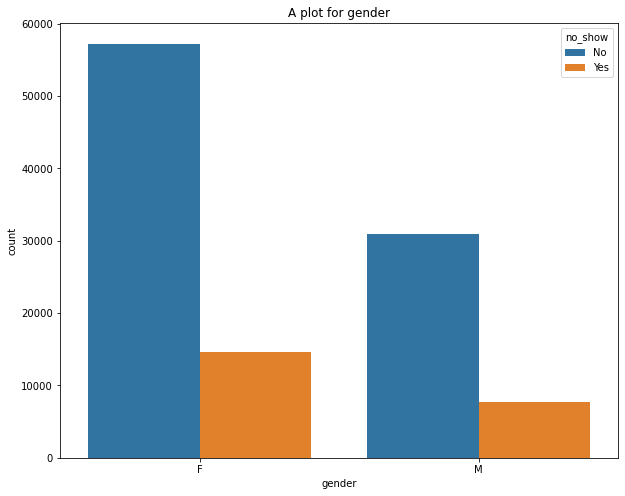

In [24]:
# To show the relationship between gender and not showing up for appointments
count_plot('gender', 'A plot for gender')

The count plot reveals that females are mostly booked for appointments and are most likely to show up. 

We would be investigating next if a particular day of the week affects the level of not showing up for appointments.

## Question 2 (will the 'Appointment Day' determine whether or not a patient will be present for his/her appointment?)

In [25]:
# To add a new column for appointment_week_day in relationship with appointment_day
df['appointment_week_day'] = df.appointment_day.dt.day_name()
df.head()

,patient_ID,appointment_ID,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,SMS_received,no_show,appointment_week_day
0,29872499824296.0,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday
1,558997776694438.0,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday
2,4262962299951.0,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday
3,867951213174.0,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday
4,8841186448183.0,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday


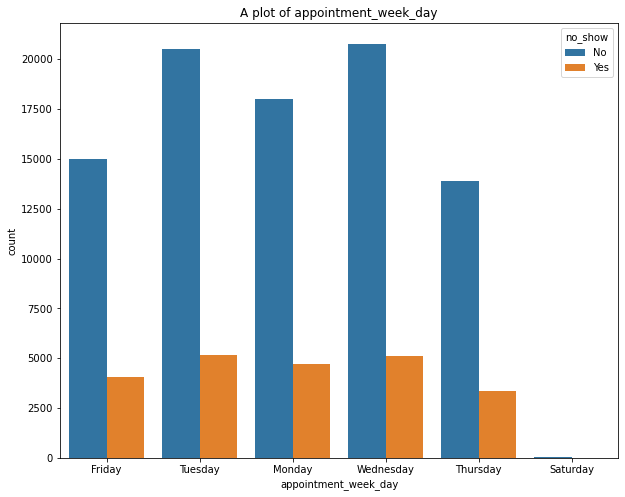

In [26]:
# To show if particular days of the week affect no show for an appointment
count_plot('appointment_week_day', 'A plot of appointment_week_day')

The count plot shows that more patients' appointments are booked on Tuesday and Wednesday. Also, patients tend to show up more on these days. The day of the week with no show up at all is Saturday. Next, we would be categorising 'age' into different age groups for easy identification. 

## Question 3 (will the 'Age' of a patient predict if they will show up for an appointment or not?)

In [27]:
bins= [0, 2, 4, 13, 20, 65, 120]
labels = ['Infant', 'Toddler', 'Kid', 'Teen', 'Adult', 'Aged' ]
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
df.head()

,patient_ID,appointment_ID,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,SMS_received,no_show,appointment_week_day,age_group
0,29872499824296.0,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,Adult
1,558997776694438.0,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday,Adult
2,4262962299951.0,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday,Adult
3,867951213174.0,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday,Kid
4,8841186448183.0,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday,Adult


In [28]:
df.age_group.unique()

['Adult', 'Kid', 'Aged', 'Teen', 'Toddler', 'Infant']
Categories (6, object): ['Infant' < 'Toddler' < 'Kid' < 'Teen' < 'Adult' < 'Aged']

<AxesSubplot:xlabel='age_group', ylabel='Count'>

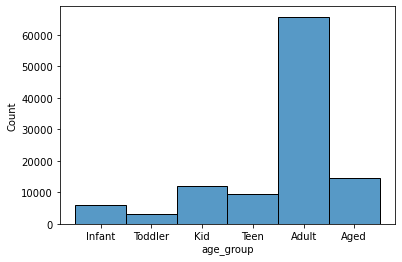

In [29]:
sns.histplot(data= df, x = df.age_group)

In [30]:
age_group = df.age_group.value_counts()
age_group

Adult      65713
Aged       14402
Kid        12093
Teen        9375
Infant      5812
Toddler     3131
Name: age_group, dtype: int64

In [31]:
age_group.index

CategoricalIndex(['Adult', 'Aged', 'Kid', 'Teen', 'Infant', 'Toddler'], categories=['Infant', 'Toddler', 'Kid', 'Teen', 'Adult', 'Aged'], ordered=True, dtype='category')

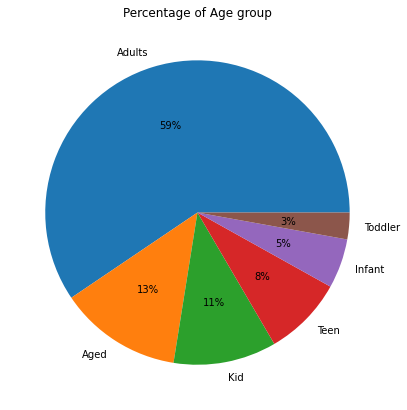

In [32]:
# To show the percentage of age group
data = [65713, 14397, 12093, 9375, 5812, 3131]
labels = ['Adults', 'Aged', 'Kid', 'Teen', 'Infant', 'Toddler']
title = 'Percentage of Age group'
plt.figure(figsize= (7,7))
plt.title(title)
plt.pie(x = data, labels = labels, autopct='%.0f%%')
plt.show()

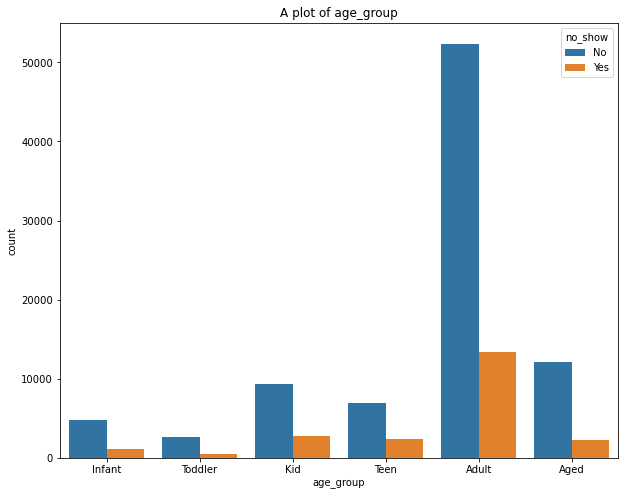

In [33]:
# To show if being under a particular age group affect showing up for an appointment
count_plot('age_group', 'A plot of age_group')

A total of 59% of adults were booked for appointments and with the highest amount of show ups compared to the other other age groups. Kids and aged people had almost same percentage (11% and 13% respectively) with similar amount of no show ups. Teens, infants and toddlers seem to have the least amount of appointments and show up (8%, 5% and 3% respectively).

## Question 4 (Does being under the "Bolsa Familia" scholarship affect whether or not a patient will show up for an appointment?)

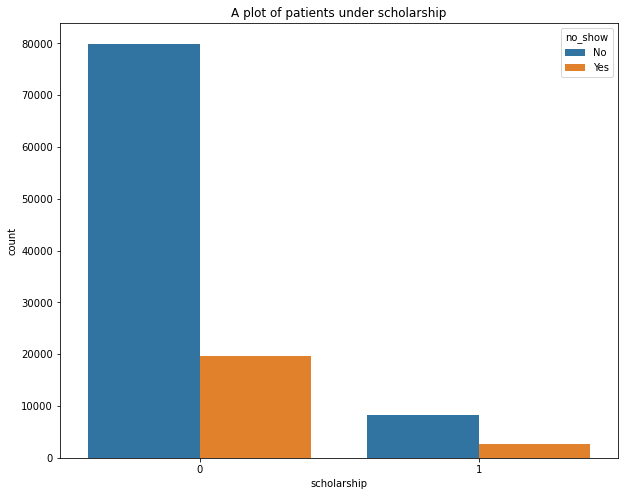

In [34]:
# To show if being under a scholarship or not affected showing up for an appointment
count_plot('scholarship', 'A plot of patients under scholarship')

Patients with no scholarship had more appointments and more show ups than patients under scholarship.

## Question 5 (Is there a relationship between not receiving an SMS to missing an appointment?)

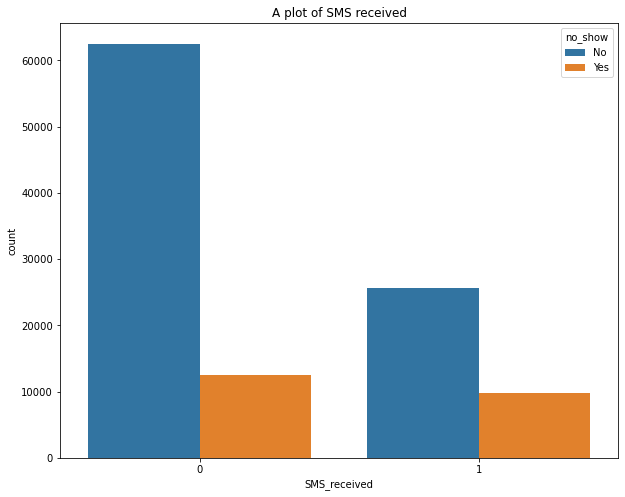

In [35]:
# To show the relationship between not receiving an SMS to no show for an appointment
count_plot('SMS_received', 'A plot of SMS received')

When compared to the total count of patients, less patients received SMS' for their appointments. Also, the show up for patients who did not receive SMS' tends to be more.

## Question 6 ( Does being hypertensive and diabetic prevent a patient from showing up for an appointment?)

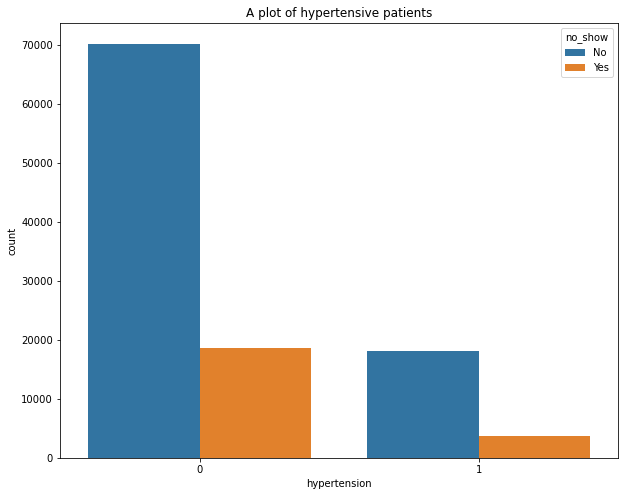

In [36]:
# To show the effect of being hypertensive in response to appointments
count_plot( 'hypertension', 'A plot of hypertensive patients')

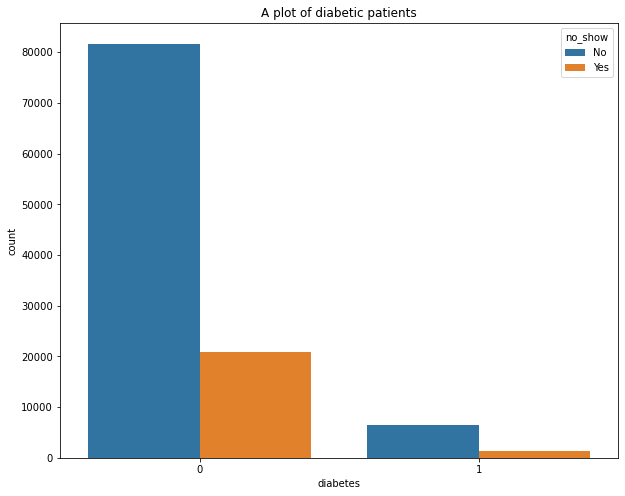

In [37]:
# To show the effect of being diabetic in response to appointments
count_plot(x = 'diabetes',title = 'A plot of diabetic patients')

## Question 7 (Will a handicapped patient find it difficult to show up for an appointment?)

Patients who are not hypertensive and diabetic have largely to an extent more booked appointments than hypertensive and diabetic patients. 

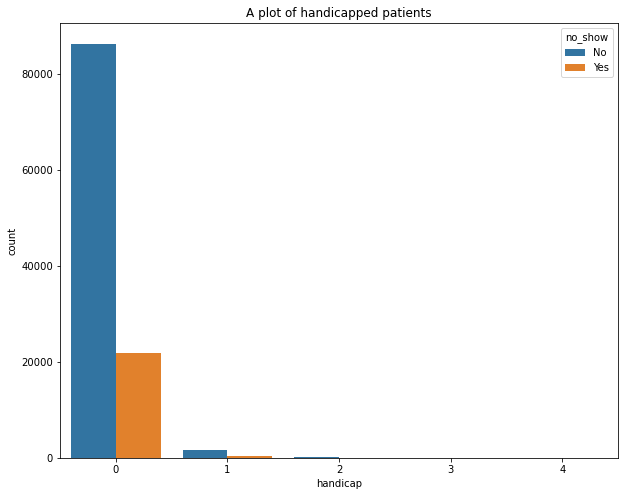

In [38]:
# To show the effect of being handicapped in response to appointments
count_plot('handicap','A plot of handicapped patients')

The countplot shows that patients who are physically challenged (handicapped) had really low numbers of booked appointments proving that majority of the patients were not handicapped. 

## Question 8 (Will being an alcoholic determine if a patient will show up for an appointment or not?)

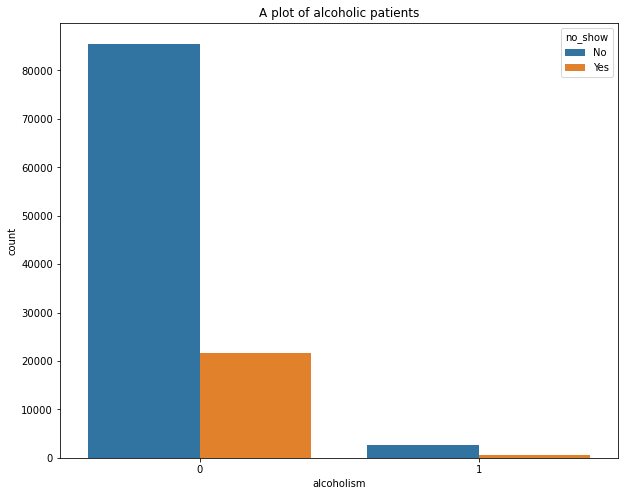

In [39]:
# To show the effect of being an alcoholic in response to appointments
count_plot('alcoholism','A plot of alcoholic patients')

It would seem that very few alcoholic patients had appointments. Majority of the patients are non-alcoholics and have more show ups.

## Finally we would be checking the general percentage of patients with "no_shows" and those who showed up for their appointment.

In [40]:
no_show = df.no_show.value_counts()
no_show

No     88207
Yes    22319
Name: no_show, dtype: int64

In [41]:
no_show.index

Index(['No', 'Yes'], dtype='object')

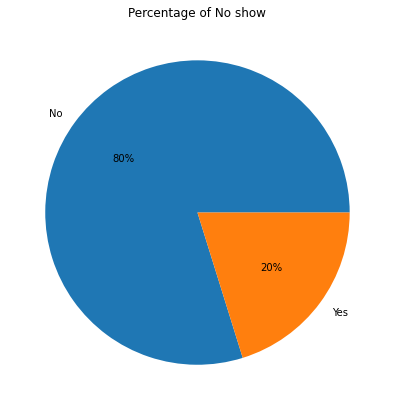

In [42]:
# To show the percentage of patients who showed up for their appointment and those who didn't show up
data = [88207, 22319]
labels = ['No', 'Yes']
title = 'Percentage of No show'
plt.figure(figsize= (7,7))
plt.title(title)
plt.pie(x = data, labels = labels, autopct='%.0f%%')
plt.show()

The pie chart above shows that a total of 80% of patients showed up for their appointment while 20% of the total patients given appointment did not show up for their appointment.

## Conclusion

The Investigation of this dataset first show some basic facts about it; the data is clean to a large degree with no duplicate rows and missing values. Furthermore, some factors were used to consider the reason why patients might no show up for an appointment; these factors include: gender, appointment day, age, scholarship, SMS received, and if the patient is hypertensive, diabetic, handicapped or an alcoholic. All of these factors were considered as variables during analysis against the constant "no show" which gives the information about patients who showed up and those who didn't show up for thier appointments. Some of my findings are written below:

1. A total number of 11,0527 patients data were collated; of these numbers, 8,8207 (80%) of the patients showed up for their appointment while 22319 (20%) didn't show up.
2. Females are more likely book an appointment and show up for the appointment than males. The gender of a patient might affect if the patient will show up or not.
3. Patients whose appointments were booked on weekdays are more likely to show up for their appointment than patients who are booked on weekends. This would mean that the day an appointment is booked does affect if a patient will show up or not.
4. More adults were booked  and showed up for their appointment compared to other age groups. This means that the age group a patient belongs to does affect if they would show up for an appointment or not.
5. Patients with no scholarship had more appointments and more show ups than patients under scholarship. This shows that scholarship does not determine if a patient will or will not show up for an appointment.
6. A fewer number of patients received SMS' compared to the total number of patients booked for appointment; the show up of patients who did not receive an SMS was higher regardless. Receiving SMS does determine whether or not a patient will show up for an appointment.
7. Patients who are not hypertensive and diabetic have largely to an extent more booked appointments than hypertensive and diabetic patients. Being hypertensive and diabetic might not be considered as a reason why patients will or will not show up for their appointment.
8. The countplot shows that patients who are physically challenged (handicapped) had really low numbers of booked appointments proving that majority of the patients were not handicapped. This factor does not determine if a patient will show up for an appointment or not.
9. It would seem that very few alcoholic patients had appointments. Majority of the patients are non-alcoholics and have more show ups. Being an alcoholic does not determine whether a patient will show up for an appointment or not.


### Limitation
- Most of the variables in the dataset are categorical, thus, limiting the kind of analysis that can be done.

## References

1. Google Wikipedia
2. Oxford English dictionary